# Seminar 1

Uz pomoć .fna datoteke iz kraken baze gradim svoju vlastitu. Kako bi to napravila morala sam svaku sekvencu odvojiti u zaseban file. Nakon pisanja python skripte dobila sam 2187 datoteka sastavljenih od 75 različitih taxid-eva. Za pokretanje skani alata dodatno sam nasumično subsamplala readove, s broja 2588006 na 10000, koristeći 91 taxid. Konačno, dobivene rezultate spremila sam u 'skani_results_file.tsv'. Također, provela sam i klasifikaciju s krakenom, a izlaz sam postavila u 'kraken_output.tsv' datoteku.

## Evaluacija

In [1]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
skani = {'2173': 33, '859': 56, '1681': 40, '1590': 66, '1623': 31, '1282': 65, '2317': 26, '1309': 39, '74426': 28, '47678': 97, '732': 42, '28025': 42, '33033': 29, '1496': 74, '1318': 22, '292800': 75, '239935': 61, '1683': 20, '39485': 38, '853': 49, '1352': 45, '137591': 47, '1502': 73, '29347': 71, '199': 49, '454155': 7, '2702': 33, '847': 41, '33038': 43, '166486': 86, '823': 92, '1328': 42, '28118': 78, '29391': 36, '28132': 22, '1491': 83, '113107': 1, '1322': 51, '907': 37, '47715': 53, '33035': 121, '47770': 54, '54005': 25, '157687': 31, '214856': 61, '84112': 50, '29466': 41, '301301': 60, '1260': 21, '1685': 61, '216816': 40, '649756': 40, '210': 32, '1689': 50, '1747': 42, '43675': 26, '89153': 57, '1379': 37, '851': 37, '446660': 25, '187327': 44, '2047': 31, '76517': 36, '861': 65, '1358': 51, '154046': 4, '1311': 45, '28026': 47, '1338': 35, '39778': 3, '1598': 28, '901': 11, '1680': 30, '45634': 11, '89152': 26, '328814': 8, '2098': 16, '827': 11, '860': 3, '329854': 3, '39488': 1, '249188': 1, '84030': 2, '502558': 1}
# zbroj = 3347
# len = 84

kraken = {'301301': 145, '823': 242, '847': 92, '851': 185, '29391': 66, '1358': 103, '1685': 116, '28118': 172, '199': 88, '2173': 69, '1590': 132, '28132': 136, '292800': 156, '47678': 232, '137591': 92, '1680': 70, '54005': 73, '89153': 141, '239935': 125, '89152': 93, '29466': 169, '853': 131, '1689': 104, '907': 92, '2317': 60, '1491': 177, '210': 59, '157687': 95, '166486': 164, '47715': 114, '861': 166, '33035': 234, '214856': 238, '1623': 88, '1352': 94, '1681': 93, '1378': 1, '33038': 133, '1683': 67, '39485': 84, '28025': 80, '1311': 86, '76517': 73, '187327': 95, '45634': 78, '859': 110, '1496': 176, '1322': 104, '732': 129, '74426': 99, '84112': 150, '1309': 80, '216816': 93, '2047': 84, '2098': 36, '47770': 115, '186803': 15, '1328': 99, '29347': 162, '901': 115, '1379': 80, '1747': 87, '1260': 83, '1502': 145, '1338': 78, '2702': 77, '1282': 101, '2': 8, '1598': 78, '43675': 88, '154046': 47, '28026': 87, '827': 65, '649756': 98, '33033': 59, '113107': 22, '446660': 89, '1318': 70, '1678': 7, '1301': 5, '171549': 8, '32207': 2, '186802': 6, '1239': 2, '31979': 1, '201174': 2, '33958': 1, '1643826': 8, '841': 2, '186826': 2, '203491': 1, '671232': 2, '1783272': 1, '91061': 1}
# zbroj = 8283
# len = 94

readovi = {'301301': 138, '328814': 170, '454155': 170, '847': 90, '851': 97, '29391': 66, '1358': 104, '1685': 113, '28118': 164, '199': 88, '2173': 70, '154046': 285, '1590': 133, '47671': 114, '28132': 131, '292800': 171, '47678': 204, '39778': 93, '137591': 90, '1680': 68, '54005': 73, '89153': 146, '239935': 123, '89152': 93, '29466': 85, '113107': 98, '853': 115, '1689': 100, '823': 194, '907': 101, '2317': 60, '1491': 167, '329854': 214, '210': 59, '157687': 97, '166486': 152, '47715': 113, '861': 122, '33035': 227, '1623': 89, '39488': 151, '1352': 91, '1681': 85, '446660': 109, '28123': 95, '33038': 139, '84030': 181, '1683': 80, '39485': 78, '1382': 75, '28025': 78, '755731': 179, '1311': 82, '249188': 90, '76517': 73, '187327': 98, '45634': 70, '859': 107, '1496': 162, '1322': 103, '74426': 93, '860': 87, '84112': 112, '109790': 67, '1309': 75, '216816': 86, '2047': 83, '2098': 36, '47770': 97, '1328': 85, '29347': 147, '901': 134, '1379': 79, '1747': 86, '1260': 89, '1502': 142, '1338': 72, '2702': 78, '1282': 100, '1598': 75, '43675': 86, '732': 100, '502558': 114, '850': 100, '214856': 172, '139208': 124, '827': 69, '28026': 90, '649756': 85, '33033': 59, '1318': 65}
# zbroj = 10000
# len = 91

reference = {'210': 345, '28025': 37, '1491': 60, '216816': 81, '1311': 132, '1260': 3, '1502': 70, '2317': 1, '823': 24, '1282': 146, '1496': 123, '1747': 36, '1309': 24, '1358': 64, '1598': 34, '1680': 10, '239935': 91, '29466': 4, '2098': 17, '43675': 3, '2173': 4, '76517': 1, '732': 4, '1590': 225, '84112': 9, '47715': 48, '39485': 1, '1623': 4, '1318': 1, '1681': 13, '28132': 26, '2702': 11, '214856': 1, '1352': 298, '1685': 45, '45634': 2, '1328': 17, '1338': 6, '446660': 1, '33033': 9, '28026': 9, '1689': 4, '199': 15, '851': 11, '1683': 1, '137591': 14, '901': 1, '649756': 2, '292800': 3, '847': 5, '28118': 1, '47678': 7, '853': 12, '74426': 5, '859': 4, '907': 2, '861': 2, '113107': 2, '47770': 23, '33035': 2, '29347': 7, '154046': 1, '157687': 3, '301301': 2, '89152': 1, '89153': 1, '29391': 2, '33038': 6, '2047': 2, '827': 1, '54005': 1, '1379': 1, '1322': 1, '166486': 1, '187327': 1}
# zbroj = 2187
# len = 75

In [3]:
print(f'Taxid-evi za koje nemamo referencu a pojavljuju se u našem uzorku su: {set(list(readovi.keys()))-set(list(reference.keys()))}')

Taxid-evi za koje nemamo referencu a pojavljuju se u našem uzorku su: {'109790', '454155', '139208', '249188', '502558', '84030', '39488', '28123', '329854', '47671', '39778', '1382', '850', '755731', '860', '328814'}


Ima ih 16 i njihovi nazivi glase:
*   Porphyromonas asaccharolytica za taxid 28123
*   Haemophilus pittmaniae za taxid 249188
*   Fusobacterium mortiferum za taxid 850
*   Fusobacterium periodonticum za taxid 860
*   Lautropia mirabilis za taxid 47671
*   Bacteroides intestinalis za taxid 329854
*   Isoptericola variabilis za taxid 139208
*   Lancefieldella parvula za taxid 1382
*   Lactobacillus jensenii za taxid 109790
*   Lacrimispora saccharolytica za taxid 84030
*   Eggerthella sp. YY7918 za taxid 502558
*   Paraprevotella xylaniphila za taxid 454155
*   Anaerobutyricum hallii za taxid 39488
*   Veillonella dispar za taxid 39778
*   Clostridium sp. BNL1100 za taxid 755731
*   Alistipes shahii za taxid 328814

In [4]:
s = {}
for s1, s2 in skani.items():
  s[s1] = round((s2/3347)*100, 2)
k = {}
for k1, k2 in kraken.items():
  k[k1] = round((k2/8283)*100, 2)
q = {}
for q1, q2 in readovi.items():
  q[q1] = round((q2/10000)*100, 2)
r = {}
for r1, r2 in reference.items():
  r[r1] = round((r2/2187)*100, 2)
sort_s = dict(sorted(s.items(), key=lambda item: item[1], reverse=True))
sort_k = dict(sorted(k.items(), key=lambda item: item[1], reverse=True))
sort_q = dict(sorted(q.items(), key=lambda item: item[1], reverse=True))
sort_r = dict(sorted(r.items(), key=lambda item: item[1], reverse=True))

<ipython-input-26-9211b63f3693>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(kategorije, rotation=270, ha='center')


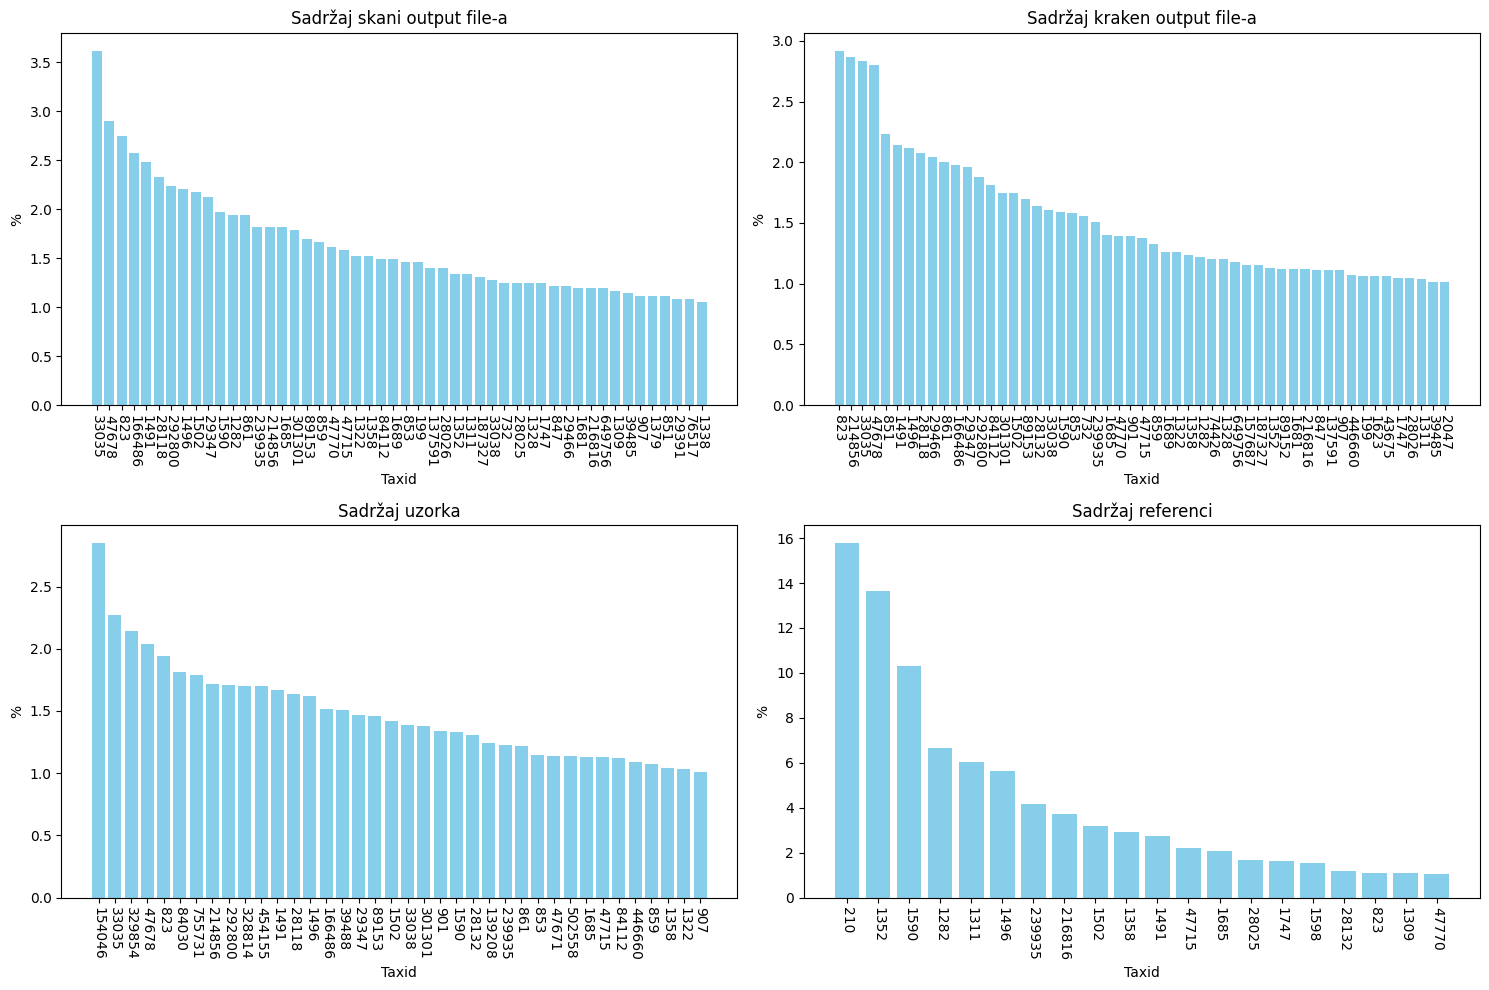

In [26]:
lista = [sort_s, sort_k, sort_q, sort_r]
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for ax, rjecnik in zip(axs.flatten(), lista):
    kategorije = [k for k, v in rjecnik.items() if v > 1]
    visine_stupaca = [v for v in rjecnik.values() if v > 1]
    ax.bar(kategorije, visine_stupaca, color='skyblue')
    ax.set_xticklabels(kategorije, rotation=270, ha='center')
    ax.set_ylabel('%')
    ax.set_xlabel('Taxid')

axs[0, 0].set_title('Sadržaj skani output file-a')
axs[0, 1].set_title('Sadržaj kraken output file-a')
axs[1, 0].set_title('Sadržaj uzorka')
axs[1, 1].set_title('Sadržaj referenci')

plt.tight_layout()
plt.show()

### Skani

In [6]:
putanja_do_skani_datoteke = 'skani_results_file.tsv'
df = pd.read_csv(putanja_do_skani_datoteke, sep='\t')

In [7]:
odabrani_stupci = ['Align_fraction_query', 'Ref_name', 'Query_name','Query_file']
df_odabrani = df[odabrani_stupci]
tablica = list(df_odabrani.iloc)
pom = 0
dictionary = {}
rjecnik = {}
for i in tablica:
  ref_name = i[0].split('|')[0]
  ref_taxid = i[0].split('speciesID|')[-1].split('|')[0]
  query_id = i[1].split(',')[0].split(' ')[0]
  query_name = i[1].split(',')[0].split(' ')[-1]
  query_speciesid = i[2].split('|')[3]
  ani_score = i[-1]
  if query_speciesid != ref_taxid:
    pom += 1
  if (ref_name, ref_taxid) in dictionary:
    ubaci = [ani_score, query_speciesid, query_name, query_id]
    dictionary[(ref_name, ref_taxid)].append(ubaci)
  else:
    ubaci = [ani_score, query_speciesid, query_name, query_id]
    dictionary[(ref_name, ref_taxid)] = [ubaci]
  if (query_id, query_name, query_speciesid) in rjecnik:
    ubaci = [ani_score, ref_name, ref_taxid]
    rjecnik[(query_id, query_name, query_speciesid)].append(ubaci)
  else:
    ubaci = [ani_score, ref_name, ref_taxid]
    rjecnik[(query_id, query_name, query_speciesid)] = [ubaci]
print(f'Učitanih rezultata ima {len(tablica)}!')
print(f'Postoji {pom} redova s različito određenim taxid-evima između reference i reada. (5.08%)')

Učitanih rezultata ima 76389!
Postoji 3882 redova s različito određenim taxid-evima između reference i reada. (5.08%)


In [27]:
t = {}
for k,v in dictionary.items():
  dictionary[k] = sorted(v, key=lambda x: x[0], reverse=True)
  t[k] = dictionary[k][0]
print(f'Ispisani retci se odnose na {len(list(dictionary.items()))} početnih .fna datoteka, odnosno za {2187-len(list(dictionary.items()))} organizama nije ništa klasificirano.')
br = 0
for k,v in t.items():
  if k[-1] == v[1]:
    br += 1
print(f'Od toga je {br} referenca s jednako određenim taxid-om kao i kod read-a, a {2129-br} s različito određenim taxid-evima.')

Ispisani retci se odnose na 2129 početnih .fna datoteka, odnosno za 58 organizama nije ništa klasificirano.
Od toga je 2101 referenca s jednako određenim taxid-om kao i kod read-a, a 28 s različito određenim taxid-evima.


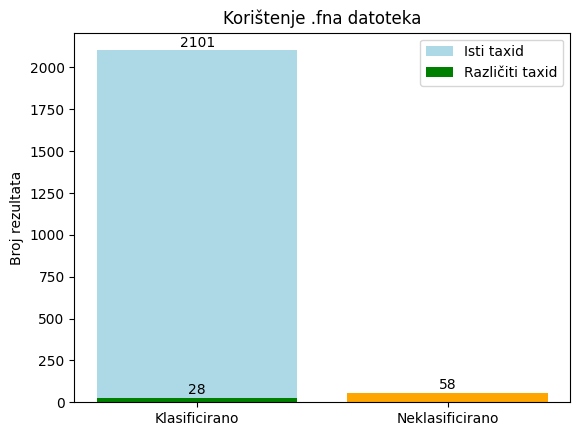

In [28]:
podaci = {
    'Podgrupa': ['Klasificirano', 'Klasificirano', 'Neklasificirano'],
    'Vrijednost': [2101, 28, 58],
    'Boje': ['lightblue', 'green', 'orange']
}

df = pd.DataFrame(podaci)
fig, ax = plt.subplots()
bars = ax.bar(df['Podgrupa'], df['Vrijednost'], color=df['Boje'])
for bar, v in zip(bars, df['Vrijednost']):
    ax.text(bar.get_x() + bar.get_width() / 2, v + 5, str(v), ha='center', va='bottom')
ax.set_title('Korištenje .fna datoteka')
ax.set_ylabel('Broj rezultata')
ax.legend(bars, ['Isti taxid', 'Različiti taxid'])
plt.show()

Ne postoji niti jedan read u uzorku za:

*   1 strain (od ukupno 298) taxid-a 1352 -> Enterococcus faecium isolate EFE11651 chromosome IV
*   55 strainova (od ukupno 60) taxid-a 1491 -> Clostridium botulinum
*   2 straina (od ukupno 26) taxid-a 28132 -> Prevotella melaninogenica chromosome 2



In [10]:
novi = {}
for k,v in rjecnik.items():
  rjecnik[k] = sorted(v, key=lambda x: x[0], reverse=True)
  novi[k] = rjecnik[k][0]
print(f'Daljnjom analizom primjećujem da se ispisani retci odnose na {len(list(rjecnik.items()))} početnih readova, tj. za njih {10000-len(list(rjecnik.items()))} vrijedi da je ANI-score manji od 80%')
br = 0
for k,v in novi.items():
  if k[-1] == v[-1]:
    br += 1
print(f'Od toga je {br} readova s jednako određenim taxid-om kao i kod reference, a {3347-br} s različito određenim taxid-evima.')

Daljnjom analizom primjećujem da se ispisani retci odnose na 3347 početnih readova, tj. za njih 6653 vrijedi da je ANI-score manji od 80%
Od toga je 3276 readova s jednako određenim taxid-om kao i kod reference, a 71 s različito određenim taxid-evima.


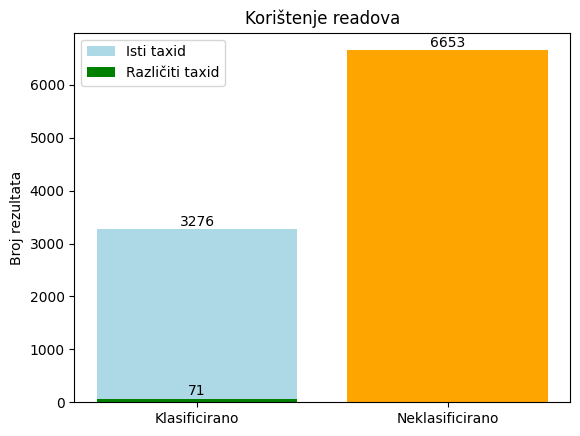

In [29]:
podaci = {
    'Podgrupa': ['Klasificirano', 'Klasificirano', 'Neklasificirano'],
    'Vrijednost': [3276, 71, 6653],
    'Boje': ['lightblue', 'green', 'orange']
}

df = pd.DataFrame(podaci)
fig, ax = plt.subplots()
bars = ax.bar(df['Podgrupa'], df['Vrijednost'], color=df['Boje'])
for bar, v in zip(bars, df['Vrijednost']):
    ax.text(bar.get_x() + bar.get_width() / 2, v + 5, str(v), ha='center', va='bottom')
ax.set_title('Korištenje readova')
ax.set_ylabel('Broj rezultata')
ax.legend(bars, ['Isti taxid', 'Različiti taxid'])
plt.show()

TP = 3276, FP = 71, FN = 6653

Preciznost: 0.9788
Odziv: 0.3299
F1-mjera: 0.4935
Točnost: 0.3276
ROC AUC: 0.4964


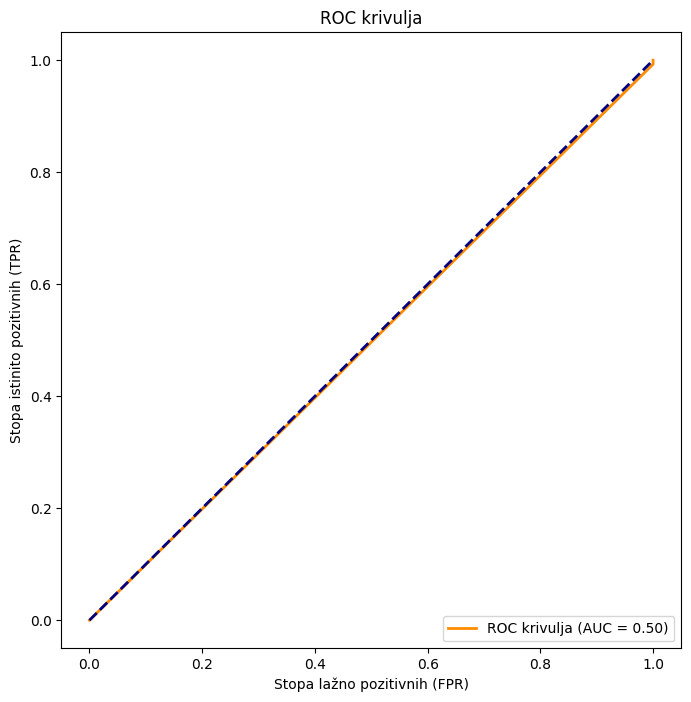

In [12]:
TP = 3276
FP = 71
FN = 6653
TN = 0

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)
accuracy = (TP + TN) / (TP + FP + FN + TN)

total_positive = TP + FN
total_negative = FP + TN

print(f'Preciznost: {precision:.4f}')
print(f'Odziv: {recall:.4f}')
print(f'F1-mjera: {f1:.4f}')
print(f'Točnost: {accuracy:.4f}')

fpr, tpr, thresholds = roc_curve([1] * total_positive + [0] * total_negative, [1] * TP + [0] * FP + [1] * FN + [0] * TN)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc:.4f}')

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC krivulja (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Stopa lažno pozitivnih (FPR)')
plt.ylabel('Stopa istinito pozitivnih (TPR)')
plt.title('ROC krivulja')
plt.legend(loc='lower right')
plt.show()

### Kraken

In [15]:
putanja_do_kraken_datoteke = 'kraken_output.tsv'
df = pd.read_csv(putanja_do_kraken_datoteke, sep='\t')

In [16]:
neklasificirani = []
klasificirani = {}
with open(putanja_do_kraken_datoteke, 'r') as file:
  for red in file:
    podaci = red.split('\t')
    if podaci[0] == 'U':
      neklasificirani.append(podaci[1])
    elif podaci[0] == 'C':
      klasificirani[podaci[1]] = podaci[2].split(')')[0].split(' ')[-1]

print(f'Od ukupno 10000 sekvenci, njih {len(klasificirani)} se uspješno klasificiralo, dok je {len(neklasificirani)} ostalo neklasificirano.')

Od ukupno 10000 sekvenci, njih 8283 se uspješno klasificiralo, dok je 1717 ostalo neklasificirano.


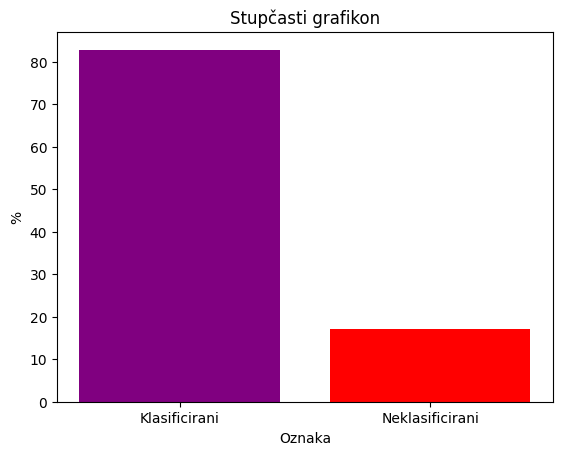

In [17]:
vrijednosti = [len(klasificirani)/100, len(neklasificirani)/100]
indeksi = ['Klasificirani', 'Neklasificirani']
plt.bar(indeksi, vrijednosti, color=['purple', 'red'])
plt.xlabel('Oznaka')
plt.ylabel('%')
plt.title('Stupčasti grafikon')
plt.show()

TP = 7361, FP = 75+847 = 922, FN = 1717

Preciznost: 0.8887
Odziv: 0.8109
F1-mjera: 0.8480
Točnost: 0.7361
ROC AUC: 0.4492


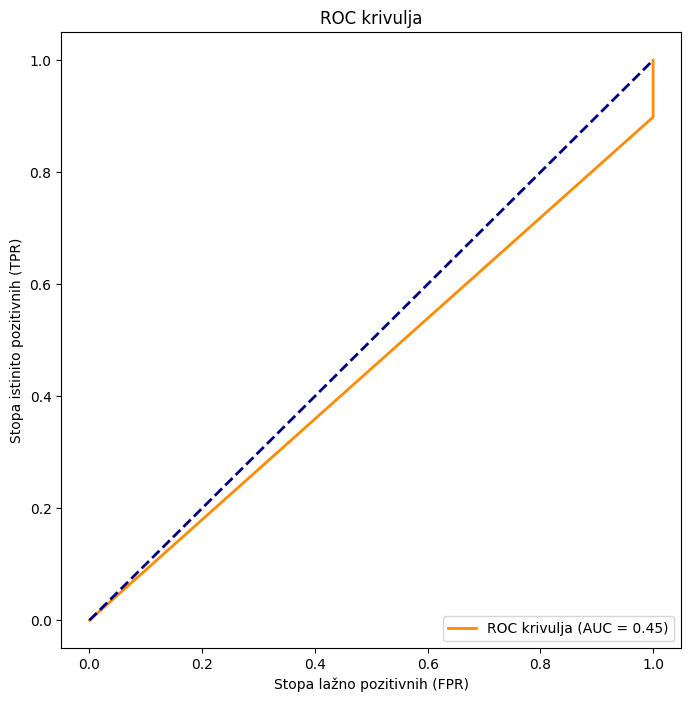

In [18]:
TP = 7361
FP = 922
FN = 1717
TN = 0

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)
accuracy = (TP + TN) / (TP + FP + FN + TN)

total_positive = TP + FN
total_negative = FP + TN

print(f'Preciznost: {precision:.4f}')
print(f'Odziv: {recall:.4f}')
print(f'F1-mjera: {f1:.4f}')
print(f'Točnost: {accuracy:.4f}')

fpr, tpr, thresholds = roc_curve([1] * total_positive + [0] * total_negative, [1] * TP + [0] * FP + [1] * FN + [0] * TN)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc:.4f}')

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC krivulja (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Stopa lažno pozitivnih (FPR)')
plt.ylabel('Stopa istinito pozitivnih (TPR)')
plt.title('ROC krivulja')
plt.legend(loc='lower right')
plt.show()

In [19]:
print(f'Svih 16 vrsti je ostalo neklasificirano: {set(list(readovi.keys()))-set(list(kraken.keys()))}')

Svih 16 vrsti je ostalo neklasificirano: {'109790', '454155', '139208', '249188', '502558', '84030', '39488', '28123', '329854', '47671', '39778', '1382', '850', '755731', '860', '328814'}


In [20]:
print(f'Kraken je pogrešno detektirao 19 organizama kojih nema u uzorku: {set(list(kraken.keys()))-set(list(readovi.keys()))}')

Kraken je pogrešno detektirao 19 organizama kojih nema u uzorku: {'32207', '1783272', '91061', '1678', '203491', '1378', '33958', '2', '1643826', '671232', '171549', '201174', '1239', '1301', '31979', '186826', '186802', '186803', '841'}


To su:


*   Gemella (taxid 1378): **1** - ['afb2fe35-74c7-b6f4-01fc-36cf84e519fd']
*   Lachnospiraceae (taxid 186803): **15** - ['60fad57d-7ae7-6bb0-0ab4-ec68f3744fed', '23451c1e-f3f2-f5e9-a074-7e7b483fb951', '2cf245ba-82a2-03c5-c39e-925ddd20e347', '1a763cd7-fd59-75b8-7f74-33a7bd6c5dea', '0c1242d0-5139-505c-5777-498ccc2d8dbd', 'a601acd9-69eb-5686-81a8-66d67c7b2d84', '1243ebb4-f7eb-5f13-b225-ec88035cdc04', '49460901-0823-ada4-87ab-d67f1a4ccc80', 'b2aadd0d-19f1-2c6b-7410-0b25e886bbf2', '0db9e05e-50c6-8fb3-aab9-d044b52cf44e', 'd15ed66c-2ef5-2e7e-cd93-4152c0f04e1d', 'b3bd7bca-4432-25de-a65a-d84b90a2b55e', 'd2a86f47-6c51-1bc0-2000-b7b2974a996e', 'be0d2336-e095-ad02-7b28-a3b54cecc769', '4628955d-00b4-16da-56a1-f57f8d84afe4']
*   Bacteria (taxid 2): **8** - ['ca0573ba-d757-98c2-8967-8fe5f325f8bc', '28d698d1-4340-ac46-6186-edc28722df45', '7d6f2e70-61c7-bad2-0d5a-fe6b1fe995a4', 'b0cb527f-fe92-b24c-8f86-0519fa4c378d', '2bff044f-182a-8478-9a0e-0a9da8adc688', '5ccf4a06-3f8c-c7c6-d999-115422ff4330', 'aa65cde0-0aa2-aecc-a7c4-fa01507cfd46', '8fe56d40-e0d8-3d8e-7e67-48076078fdca']
*   Bifidobacterium (taxid 1678): **7** - ['8447534f-d61f-fb65-f794-d8bafa9f93bc', 'b06fc6d4-7831-f3bc-b64c-a35e853258ef', '4e245dba-9bb6-730b-b296-75e8b0930347', 'fca02a24-27cc-4eb0-8778-bcdf0dabaec0', 'e838403a-5502-7558-2c8c-5fe20eb39eb8', '4aad52ae-da0b-3599-6bfb-447b1b8110b0', '0c04e6d4-b58d-0694-1981-3c8018dc3f5e']
*   Streptococcus (taxid 1301): **5** - ['8171e460-ece3-fbb9-3fc4-f181b4859e1a', 'f465762b-7b1e-fb68-c3b7-87ae855b983d', 'eadb24db-92d8-9302-9a6d-671ed34731e8', '874aa8ff-dc41-97e4-e490-c8a655d6c0de', '95bc6666-45c6-e39a-e7d2-7133464a03d6']
*   Bacteroidales (taxid 171549): **8** - ['db0c6af4-b7bf-efd1-c99e-1860e707f158', '12e8926e-6ccd-cf2e-f1ff-b06d0b032e2e', 'fa2c8196-f934-28fa-a016-a3311ea4f3fd', '3de3c988-dcd9-835a-c708-cad480319e61', 'dfc55da2-a450-fb23-dccb-eb6ca8d891bf', '53b97922-41b9-398f-7e13-fedd3c299c5f', '03c73796-9d1d-caa2-adbb-58e4f0921c19', '4ffd4e07-eec7-2edc-beae-bb1155fa190d']
*   Rothia (taxid 32207): **2** - ['d961c661-cc20-151c-d29c-c6a2af39d7e6', '0f9548d4-17cb-72a2-4f05-429f4ce72f42']
*   Eubacteriales (taxid 186802): **6** - ['61d67a0e-2eee-ca03-8472-fa5c97440418', '2eeb33bb-98e9-2bb7-e090-0a5389326a36', '988f46e2-b104-09ba-0393-a8cb0fcbfa9f', '24e7c617-dfd0-2a38-6202-fe872cfbb6cb', 'b417d652-f730-20a1-3032-b4bc02c07453', 'e87e55de-44bc-959d-bb34-29aba82590a4']
*   Bacillota (taxid 1239): **2** - ['ec3c3472-5eb5-b2dc-213e-e844abaec980', 'ea58e800-edf8-bf18-63d0-90cc45ec8a67']
*   Clostridiaceae (taxid 31979): **1** - ['a4142e30-7f7a-2209-faca-90d8ba21f04a']
*   Actinomycetota (taxid 201174): **2** - ['a2d6e6a8-3baf-e504-36a9-477db5313c00', 'b755b84f-01ba-acfe-2d51-e3838c8c475b']
*   Lactobacillaceae (taxid 33958): **1** - ['a06dcdb1-a220-880f-c8a4-b7367ceb4126']
*   Eggerthellaceae (taxid 1643826): **8** - ['59809d1b-369b-89de-b21b-4a20dc4b0766', '64250508-8bce-bee2-01c6-26335e6a52fc', '52bb77d2-753c-6348-ed0d-3aa6c889f46c', '4fc2673b-3377-994f-d65a-694c93ae27c1', 'e6b2266a-7cf7-fc05-69ef-1f18474f0f08', '40478866-c6c5-a6c5-1738-f9b918cc69da', '17d7e2ae-1a08-0644-008c-f494d7b95956', '5abf54d9-c087-00ff-afdf-901bbdad4ebd']
*   Roseburia (taxid 841): **2** - ['778131ad-8f42-2c6b-2e41-39f1cde4f9ae', '0e13bf3d-cb98-0206-dd47-8df5efb0cc33']
*   Lactobacillales (taxid 186826): **2** - ['2fbea8d1-c58b-4b21-6f01-7f2156614b58', '6be3fe07-c20a-1999-55dc-72367f9e75c6']
*   Fusobacteriales (taxid 203491): **1** - ['1329aac4-3ae3-1b6f-3cc6-5a607f304b9e']
*   Streptococcus anginosus group (taxid 671232): **2** - ['222dd8a7-0862-ce08-046b-429a0fac4e08', '62e9b780-c3c6-b62a-d336-fd6e23f3fec3']
*   Terrabacteria group (taxid 1783272): **1** - ['4c2cb295-5b4a-e4dd-5297-dc0df2393ff5']
*   Bacilli (taxid 91061): **1** - ['efd11a4b-be8b-a541-283d-94535b5b7d84']


